**Задача 1**  
Используя заготовку в следующем окне, напишите программу для вычисления матрично-векторного умножения для матрицы в координатном формате.  
Сравните результат с выводом функции ```scipy.sparse.csr_matrix.dot``` (для этого сначала преобразуйте матрицу в CSR формат)

In [1]:
%matplotlib inline
from scipy import sparse
from matplotlib import pyplot as plt
import numpy as np

N = 1000
A = sparse.rand(N, N, 1e-3)
A = sparse.coo_matrix(A)
# A.data - элементы
# A.row - индексы строк
# A.col - индексы столбцов
b = np.random.rand(N)

#Ваш код здесь

c = np.zeros(N)

for i, j, data in zip(A.row, A.col, A.data):
    #print(i, j, data)
    c[i] += data * b[j]

In [31]:
c_real = sparse.csr_matrix(A).dot(b)

In [33]:
np.allclose(c, c_real)

True

**Задача 2**  
Напишите программу для матрично векторного умножения для матрцы в CSR формате.  
Сравните результат с выводом функции ```scipy.sparse.csr_matrix.dot``` (для этого сначала преобразуйте матрицу в CSR формат)

In [52]:
from scipy import sparse
from matplotlib import pyplot as plt
import numpy as np

N = 1000
A = sparse.rand(N, N, 1e-3)
A = sparse.csr_matrix(A)
b = np.random.rand(N)

#Ваш код здесь

d = np.zeros(N)
for i, j in zip(A.nonzero()[0], A.nonzero()[1]):
    d[i] += A[i, j] * b[j]

In [53]:
d_real = sparse.csr_matrix(A).dot(b)

In [55]:
np.allclose(d, d_real)

True

**Задача 3**  
Напишите программу (функцию) для решения системы с трехдиагональной матрицей методом прогонки. Сравните решение с решением из стандартной функции (```np.linalg.solve```)

In [185]:
from matplotlib import pyplot as plt
import numpy as np

n = 4
A = np.diag(np.random.rand(n) + 2*np.ones(n)) \
    + np.diag(np.random.rand(n-1), k = -1) \
    + np.diag(np.random.rand(n-1), k = +1)

f = np.random.rand(n)
#Ваш код здесь

c = np.zeros(n-1)
a = np.zeros(n-1)
b = np.zeros(n)

for i in range(n):
    for j in range(n):
        if (i == j):
            b[i] = A[i, j]
        if (i == j+1):
            a[i-1] = A[i, j]
        if (j == i+1):
            c[i] = A[i, j]
aa = np.array(a)
bb = np.array(b)
cc = np.array(c)
dd = np.array(f)

# прямой проход
#cc[0] = c[0]/b[0]
#dd[0] = f[0]/b[0]

for i in range(1, n):
    #cc[i] = c[i] / (b[i] - cc[i-1]*a[i-1])
    #dd[i] = (f[i] - a[i-1] * dd[i-1]) / (b[i] - cc[i-1] * a[i-1])
    bb[i] = bb[i] - cc[i-1] * (aa[i-1]/bb[i-1])
    #cc[i] = cc[i] / (bb[i] - cc[i-1]*aa[i-1])
    #dd[i] = (dd[i] - aa[i-1] * dd[i-1]) / (bb[i] - cc[i-1] * aa[i-1])
    dd[i] = dd[i] - dd[i-1] * (aa[i-1]/bb[i-1])
    
# обратный проход
x = np.array(bb)
#x[n-1] = dd[n-1]
x[n-1] = dd[n-1]/bb[n-1]
for i in reversed(range(n-1)):
    #x[i] = dd[i] - cc[i] * x[i+1]
    x[i] = (dd[i]-cc[i]*x[i+1])/bb[i]

In [186]:
x_real = np.linalg.solve(A, f)


In [187]:
print(x, x_real)

[ 0.28560287 -0.05366131  0.30023273  0.15369222] [ 0.28560287 -0.05366131  0.30023273  0.15369222]


In [188]:
np.allclose(x, x_real)

True

In [167]:
correct = True
if (abs(b[0] <= abs(c[0]))):
    correct = False
for i in range(n-1):
    if (abs(b[i]) < abs(a[i]) + abs(c[i])):
        correct = False
        
if(correct):
    print("Матрица хорошая")
else:
    print("Метод не сходится")

Матрица хорошая


**Задача 4** (2 балла)  
Напишите программу для решения краевой задачи 
$$
u_{xx} = f(x), \; u(0) = a, u(1) = b
$$
конечно-разностным методом. 
0. Придумайте задачу с точным аналитическим решением (нельзя брать многочлены)
1. Задайте число узлов
2. Составьте матрицу линейной системы
3. Заполните правую часть
4. Решите линейную систему с помощью функции из предыдущей задачи
5. Постройте на одном рисунке графики численного и точного решений


In [19]:
# Положим, это нашя функция:
def u_func(x):
    #res = np.exp(x) + x ** 3
    res = np.exp(x) - 1 + x * (- np.exp(1) + 1)
    return res

def func(x):
    res = np.exp(x) 
    return res

#u(0) = 1+0 = 1
u0 = 0

#u(1) = e + 1 
u1 = 0

In [20]:
n = 20000 # число узлов

In [21]:
# Строим сетку
x = np.zeros(n+2)

for i in range(n+2):
    h = 1/(n+1)
    x[i] = i * h

In [22]:
# строим матрицу линейной системы
A = np.diag(np.ones(n)*(-2)) \
    + np.diag(np.ones(n-1), k = -1) \
    + np.diag(np.ones(n-1), k = +1)

# строим правую часть
f = np.zeros(n)
for i in range(1, n+1):
    cur = x[i]
    f[i-1] = func(cur)

In [23]:
A = np.array(A)
f = np.array(f)

In [24]:
u = np.zeros(n+2)
h = 1/(n+1)
x_solved = solve_tridiag(A, f * (h ** 2))

In [25]:
def solve_tridiag(A, f):
    n = A.shape[0]
    a = np.zeros(n-1)
    b = np.zeros(n)
    c = np.zeros(n-1)

    for i in range(n):
        for j in range(n):
            if (i == j):
                b[i] = A[i, j]
            if (i == j+1):
                a[i-1] = A[i, j]
            if (j == i+1):
                c[i] = A[i, j]
        
    #print("A", A)
    #print("a", a)
    #print("b", b)
    #print("c", c)
    
    aa = np.array(a)
    bb = np.array(b)
    cc = np.array(c)
    dd = np.array(f)

    # прямой проход
    for i in range(1, n):
        bb[i] = bb[i] - cc[i-1] * (aa[i-1]/bb[i-1])
        dd[i] = dd[i] - dd[i-1] * (aa[i-1]/bb[i-1])
    
    # обратный проход
    x = np.array(bb)
    x[n-1] = dd[n-1]/bb[n-1]
    for i in reversed(range(n-1)):
        x[i] = (dd[i] - cc[i] * x[i + 1]) / bb[i]
    return x 

In [26]:
u = np.zeros(n+2)
u[0] = u0
for i in range(1, n+1):
    u[i] = x_solved[i-1] 
u[-1] = u1

In [27]:
u_real = np.zeros(n+2)

for i in range(n+2):
    u_real[i] = u_func(x[i])

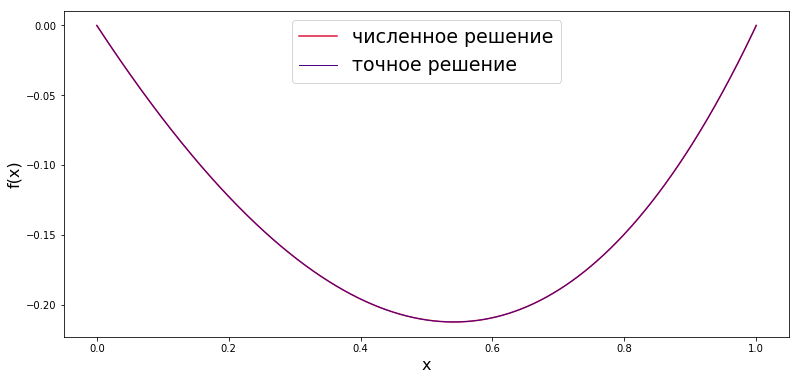

In [28]:
plt.figure(figsize=(13, 6))
plt.plot(x, u, color='crimson', label="численное решение", linewidth=1.5)
plt.plot(x, u_real, color='indigo', label="точное решение", linewidth=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.legend(fontsize=19)
plt.show()

Решения на графике полностью совпали. Вообще можно сделать число итераций поменьше, тогда работать будет быстрее и различие, возможно, будет лучше видно.